#### Create model based on cleaned data

#### Note - must run data cleaning and Matlab resampling prior to training

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py

df = pd.read_csv('SensorData_Nov5.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'time']

flow = pd.read_csv('flow_training.csv')
flow.columns = ['Flow', 'Time']

df.head()

,1,2,3,4,d1,d2,d3,d4,time
0,0.455294,0.445882,0.436471,0.460000,0.000000,0.000000,0.000000,0.000000,978.498783
1,0.450588,0.441176,0.436471,0.457647,-0.229026,-0.229026,0.000000,-0.114513,978.509057
2,0.442696,0.445912,0.430196,0.458434,-0.443745,0.058248,-0.192297,-0.042233,978.519933
3,0.443510,0.441127,0.431787,0.461190,-0.233891,-0.159182,-0.071133,0.053132,978.530686
4,0.438233,0.438236,0.429869,0.459996,-0.333070,-0.202754,-0.106158,0.004160,978.541521


In [25]:
flow.head()

,Flow,Time
0,28.168,1064.10
1,24.440,935.66
2,25.957,1005.00
3,24.299,962.11
4,24.909,989.63


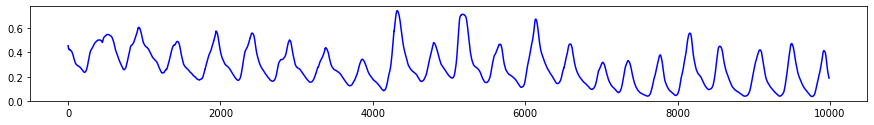

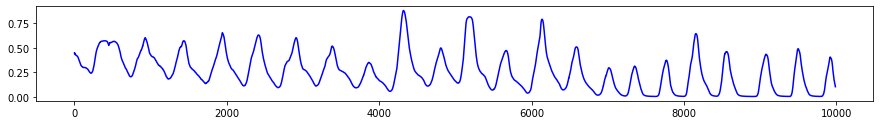

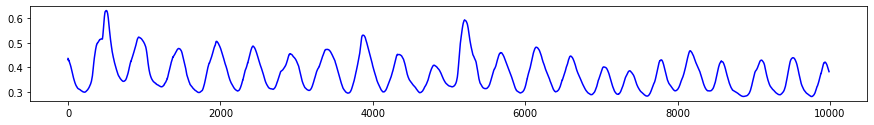

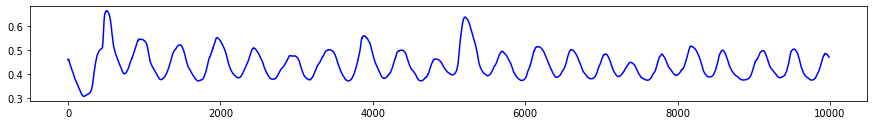

In [26]:
x = range(0, len(df))
fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,1)
plt.plot(x, df['1'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,2)
plt.plot(x, df['2'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,3)
plt.plot(x, df['3'], 'b')
plt.show()

fig = plt.figure(figsize = (15, 8))
plt.subplot(4,1,4)
plt.plot(x, df['4'], 'b')
plt.show()

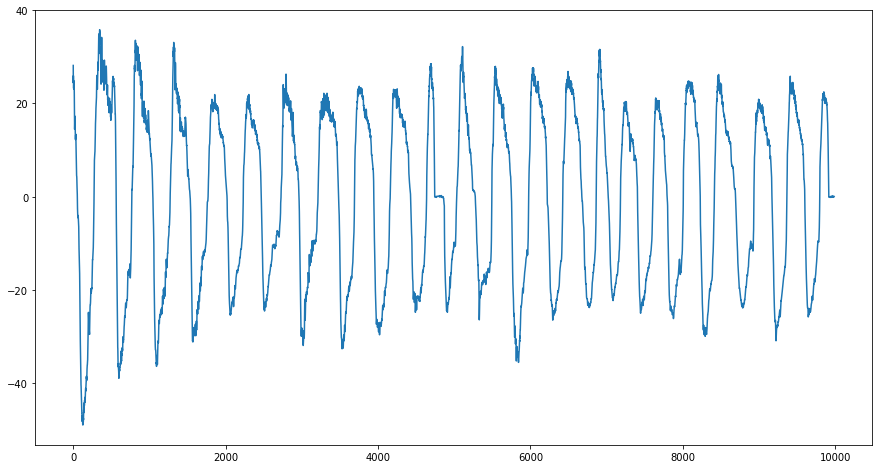

In [27]:
fig = plt.figure(figsize = (15, 8))
plt.plot(flow['Flow'])

In [42]:
def label_fix(label):
    if label < -5:
        return 0
    elif label > 5:
        return 1
    else:
        return 2

df['Class'] = flow['Flow'].apply(label_fix)

In [43]:
df.head()

,1,2,3,4,d1,d2,d3,d4,time,Class
0,0.455294,0.445882,0.436471,0.460000,0.000000,0.000000,0.000000,0.000000,978.498783,1
1,0.450588,0.441176,0.436471,0.457647,-0.229026,-0.229026,0.000000,-0.114513,978.509057,1
2,0.442696,0.445912,0.430196,0.458434,-0.443745,0.058248,-0.192297,-0.042233,978.519933,1
3,0.443510,0.441127,0.431787,0.461190,-0.233891,-0.159182,-0.071133,0.053132,978.530686,1
4,0.438233,0.438236,0.429869,0.459996,-0.333070,-0.202754,-0.106158,0.004160,978.541521,1


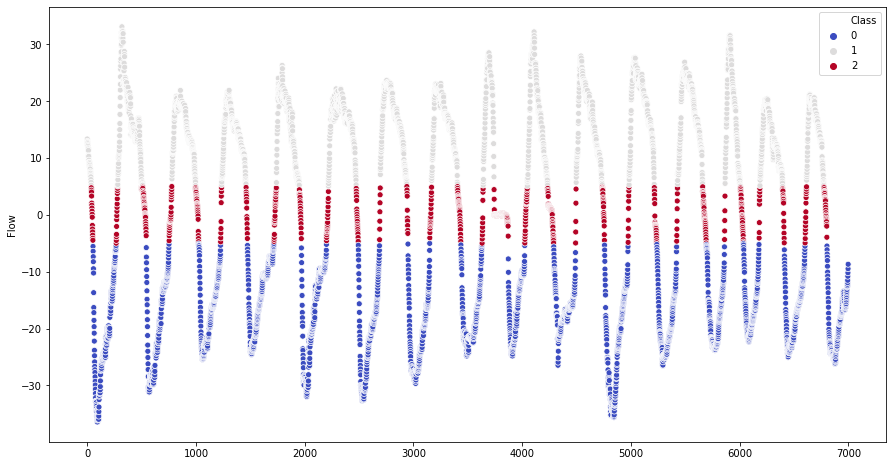

In [44]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = flow['Flow'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

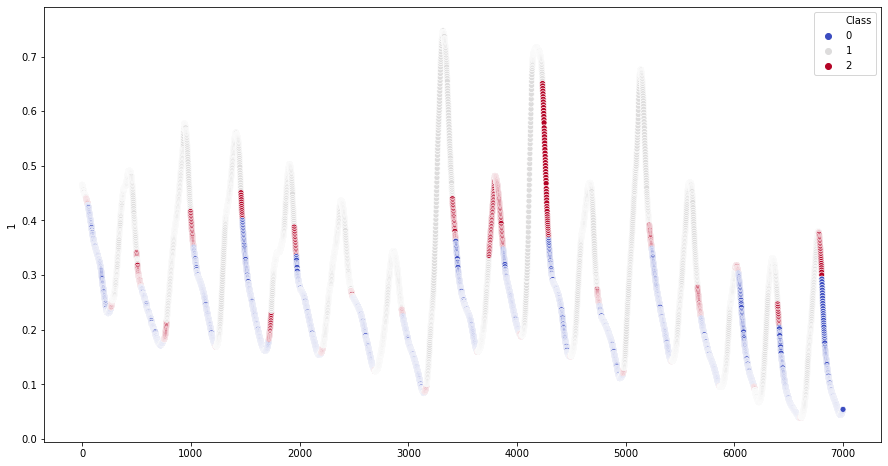

In [46]:
fig = plt.figure(figsize = (15, 8))
sns.scatterplot(y = df['1'][1000:8000], x = range(0, 7000), hue = df['Class'][1000:8000], palette = 'coolwarm')

In [47]:
# Create the data matrix
X = df.drop('Class', axis = 1)
X.drop('time', inplace = True, axis = 1)

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

In [56]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 150)               1350      
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [63]:
EPOCHS = 2000
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/2000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1406 - acc: 0.9467
Epoch 2/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1443 - acc: 0.9425
Epoch 3/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1363 - acc: 0.9452
Epoch 4/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1341 - acc: 0.9442
Epoch 5/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1379 - acc: 0.9451
Epoch 6/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1359 - acc: 0.9425
Epoch 7/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1367 - acc: 0.9457
Epoch 8/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1333 - acc: 0.9462
Epoch 9/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1368 - acc: 0.9442
Epoch 10/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 

6992/6992 [==============================] - 0s 22us/sample - loss: 0.1400 - acc: 0.9448
Epoch 81/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1219 - acc: 0.9508
Epoch 82/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1321 - acc: 0.9461
Epoch 83/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1483 - acc: 0.9412
Epoch 84/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1394 - acc: 0.9422
Epoch 85/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1274 - acc: 0.9491
Epoch 86/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1288 - acc: 0.9472
Epoch 87/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1243 - acc: 0.9508
Epoch 88/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1281 - acc: 0.9479
Epoch 89/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.138

6992/6992 [==============================] - 0s 26us/sample - loss: 0.1403 - acc: 0.9472
Epoch 159/2000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1255 - acc: 0.9482
Epoch 160/2000
6992/6992 [==============================] - 0s 33us/sample - loss: 0.1306 - acc: 0.9471
Epoch 161/2000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1331 - acc: 0.9491
Epoch 162/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1336 - acc: 0.9497
Epoch 163/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1330 - acc: 0.9467
Epoch 164/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1255 - acc: 0.9509
Epoch 165/2000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1286 - acc: 0.9488
Epoch 166/2000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1321 - acc: 0.9482
Epoch 167/2000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 27us/sample - loss: 0.1284 - acc: 0.9478
Epoch 237/2000
6992/6992 [==============================] - 0s 26us/sample - loss: 0.1245 - acc: 0.9479
Epoch 238/2000
6992/6992 [==============================] - 0s 29us/sample - loss: 0.1300 - acc: 0.9475
Epoch 239/2000
6992/6992 [==============================] - 0s 30us/sample - loss: 0.1290 - acc: 0.9489
Epoch 240/2000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1368 - acc: 0.9468
Epoch 241/2000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1263 - acc: 0.9474
Epoch 242/2000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1266 - acc: 0.9499
Epoch 243/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1240 - acc: 0.9498
Epoch 244/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1428 - acc: 0.9428
Epoch 245/2000
6992/6992 [==============================] - 0s 24us/sample - lo

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1387 - acc: 0.9441
Epoch 315/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1458 - acc: 0.9451
Epoch 316/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1350 - acc: 0.9465
Epoch 317/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1263 - acc: 0.9505
Epoch 318/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1383 - acc: 0.9445
Epoch 319/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1330 - acc: 0.9455
Epoch 320/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1334 - acc: 0.9477
Epoch 321/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1366 - acc: 0.9474
Epoch 322/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1234 - acc: 0.9514
Epoch 323/2000
6992/6992 [==============================] - 0s 26us/sample - lo

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1190 - acc: 0.9494
Epoch 393/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1381 - acc: 0.9478
Epoch 394/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1241 - acc: 0.9502
Epoch 395/2000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1240 - acc: 0.9514
Epoch 396/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1400 - acc: 0.9438
Epoch 397/2000
6992/6992 [==============================] - 0s 27us/sample - loss: 0.1341 - acc: 0.9488
Epoch 398/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1316 - acc: 0.9471
Epoch 399/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1384 - acc: 0.9489
Epoch 400/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1245 - acc: 0.9538
Epoch 401/2000
6992/6992 [==============================] - 0s 27us/sample - lo

6992/6992 [==============================] - 0s 22us/sample - loss: 0.1186 - acc: 0.9519
Epoch 471/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1336 - acc: 0.9477
Epoch 472/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1274 - acc: 0.9494
Epoch 473/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1190 - acc: 0.9521
Epoch 474/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1359 - acc: 0.9472
Epoch 475/2000
6992/6992 [==============================] - 0s 28us/sample - loss: 0.1258 - acc: 0.9507
Epoch 476/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1286 - acc: 0.9481
Epoch 477/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1324 - acc: 0.9484
Epoch 478/2000
6992/6992 [==============================] - 0s 31us/sample - loss: 0.1421 - acc: 0.9458
Epoch 479/2000
6992/6992 [==============================] - 0s 27us/sample - lo

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1286 - acc: 0.9522
Epoch 549/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1310 - acc: 0.9469
Epoch 550/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1377 - acc: 0.9459
Epoch 551/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1366 - acc: 0.9494
Epoch 552/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1253 - acc: 0.9522
Epoch 553/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1332 - acc: 0.9472
Epoch 554/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1255 - acc: 0.9498
Epoch 555/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1294 - acc: 0.9539
Epoch 556/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1360 - acc: 0.9488
Epoch 557/2000
6992/6992 [==============================] - 0s 23us/sample - lo

6992/6992 [==============================] - 0s 22us/sample - loss: 0.1319 - acc: 0.9468
Epoch 627/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1258 - acc: 0.9527
Epoch 628/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1258 - acc: 0.9475
Epoch 629/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1222 - acc: 0.9481
Epoch 630/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1292 - acc: 0.9492
Epoch 631/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1343 - acc: 0.9478
Epoch 632/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1260 - acc: 0.9515
Epoch 633/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1272 - acc: 0.9492
Epoch 634/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1254 - acc: 0.9502
Epoch 635/2000
6992/6992 [==============================] - 0s 23us/sample - lo

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1253 - acc: 0.9507
Epoch 705/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1176 - acc: 0.9537
Epoch 706/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1276 - acc: 0.9474
Epoch 707/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1275 - acc: 0.9502
Epoch 708/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1217 - acc: 0.9508
Epoch 709/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1247 - acc: 0.9509
Epoch 710/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1358 - acc: 0.9464
Epoch 711/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1336 - acc: 0.9477
Epoch 712/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1248 - acc: 0.9494
Epoch 713/2000
6992/6992 [==============================] - 0s 23us/sample - lo

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1255 - acc: 0.9505
Epoch 783/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1227 - acc: 0.9517
Epoch 784/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1211 - acc: 0.9542
Epoch 785/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1368 - acc: 0.9509
Epoch 786/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1312 - acc: 0.9472
Epoch 787/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1264 - acc: 0.9475
Epoch 788/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1294 - acc: 0.9455
Epoch 789/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1289 - acc: 0.9468
Epoch 790/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1254 - acc: 0.9495
Epoch 791/2000
6992/6992 [==============================] - 0s 22us/sample - lo

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1223 - acc: 0.9511
Epoch 861/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1234 - acc: 0.9497
Epoch 862/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1252 - acc: 0.9481
Epoch 863/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1192 - acc: 0.9534
Epoch 864/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1103 - acc: 0.9549
Epoch 865/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1259 - acc: 0.9517
Epoch 866/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1256 - acc: 0.9467
Epoch 867/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1191 - acc: 0.9531
Epoch 868/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1232 - acc: 0.9524
Epoch 869/2000
6992/6992 [==============================] - 0s 25us/sample - lo

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1257 - acc: 0.9511
Epoch 939/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1361 - acc: 0.9515
Epoch 940/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1267 - acc: 0.9501
Epoch 941/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1272 - acc: 0.9502
Epoch 942/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1233 - acc: 0.9502
Epoch 943/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1221 - acc: 0.9522
Epoch 944/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1234 - acc: 0.9532
Epoch 945/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1197 - acc: 0.9554
Epoch 946/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1263 - acc: 0.9477
Epoch 947/2000
6992/6992 [==============================] - 0s 23us/sample - lo

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1409 - acc: 0.9489
Epoch 1017/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1323 - acc: 0.9495
Epoch 1018/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1161 - acc: 0.9548
Epoch 1019/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1203 - acc: 0.9521
Epoch 1020/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1184 - acc: 0.9555
Epoch 1021/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1214 - acc: 0.9525
Epoch 1022/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1241 - acc: 0.9491
Epoch 1023/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1224 - acc: 0.9512
Epoch 1024/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1168 - acc: 0.9517
Epoch 1025/2000
6992/6992 [==============================] - 0s 25us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1155 - acc: 0.9571
Epoch 1095/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1170 - acc: 0.9544
Epoch 1096/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1233 - acc: 0.9558
Epoch 1097/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1224 - acc: 0.9498
Epoch 1098/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1208 - acc: 0.9529
Epoch 1099/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1234 - acc: 0.9542
Epoch 1100/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1248 - acc: 0.9545
Epoch 1101/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1228 - acc: 0.9518
Epoch 1102/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1218 - acc: 0.9497
Epoch 1103/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.1213 - acc: 0.9507
Epoch 1173/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1178 - acc: 0.9548
Epoch 1174/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1222 - acc: 0.9521
Epoch 1175/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1226 - acc: 0.9527
Epoch 1176/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1290 - acc: 0.9487
Epoch 1177/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1179 - acc: 0.9528
Epoch 1178/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1263 - acc: 0.9478
Epoch 1179/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1206 - acc: 0.9527
Epoch 1180/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1203 - acc: 0.9539
Epoch 1181/2000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1062 - acc: 0.9551
Epoch 1251/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1306 - acc: 0.9491
Epoch 1252/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1109 - acc: 0.9552
Epoch 1253/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1214 - acc: 0.9544
Epoch 1254/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1216 - acc: 0.9551
Epoch 1255/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1172 - acc: 0.9531
Epoch 1256/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1165 - acc: 0.9532
Epoch 1257/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1162 - acc: 0.9555
Epoch 1258/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1184 - acc: 0.9534
Epoch 1259/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1295 - acc: 0.9511
Epoch 1329/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1219 - acc: 0.9558
Epoch 1330/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1105 - acc: 0.9575
Epoch 1331/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1148 - acc: 0.9532
Epoch 1332/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1120 - acc: 0.9570
Epoch 1333/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1179 - acc: 0.9524
Epoch 1334/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1169 - acc: 0.9521
Epoch 1335/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1211 - acc: 0.9505
Epoch 1336/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1201 - acc: 0.9541
Epoch 1337/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1286 - acc: 0.9538
Epoch 1407/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1306 - acc: 0.9507
Epoch 1408/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1207 - acc: 0.9542
Epoch 1409/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1343 - acc: 0.9508
Epoch 1410/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1216 - acc: 0.9522
Epoch 1411/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1293 - acc: 0.9509
Epoch 1412/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1204 - acc: 0.9531
Epoch 1413/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1107 - acc: 0.9574
Epoch 1414/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1217 - acc: 0.9532
Epoch 1415/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1177 - acc: 0.9549
Epoch 1485/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1130 - acc: 0.9562
Epoch 1486/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1180 - acc: 0.9532
Epoch 1487/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1093 - acc: 0.9559
Epoch 1488/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1278 - acc: 0.9508
Epoch 1489/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1146 - acc: 0.9552
Epoch 1490/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1199 - acc: 0.9524
Epoch 1491/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1197 - acc: 0.9542
Epoch 1492/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1174 - acc: 0.9508
Epoch 1493/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1165 - acc: 0.9541
Epoch 1563/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1296 - acc: 0.9517
Epoch 1564/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1199 - acc: 0.9515
Epoch 1565/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1079 - acc: 0.9549
Epoch 1566/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1140 - acc: 0.9554
Epoch 1567/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1234 - acc: 0.9537
Epoch 1568/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1171 - acc: 0.9529
Epoch 1569/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1219 - acc: 0.9537
Epoch 1570/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1183 - acc: 0.9552
Epoch 1571/2000
6992/6992 [==============================] - 0s 22us/sa

6992/6992 [==============================] - 0s 25us/sample - loss: 0.1236 - acc: 0.9498
Epoch 1641/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1212 - acc: 0.9574
Epoch 1642/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1180 - acc: 0.9547
Epoch 1643/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1120 - acc: 0.9554
Epoch 1644/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1154 - acc: 0.9574
Epoch 1645/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1106 - acc: 0.9529
Epoch 1646/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1194 - acc: 0.9542
Epoch 1647/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1115 - acc: 0.9544
Epoch 1648/2000
6992/6992 [==============================] - 0s 22us/sample - loss: 0.1157 - acc: 0.9554
Epoch 1649/2000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1193 - acc: 0.9555
Epoch 1719/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1344 - acc: 0.9507
Epoch 1720/2000
6992/6992 [==============================] - 0s 25us/sample - loss: 0.1156 - acc: 0.9571
Epoch 1721/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1372 - acc: 0.9532
Epoch 1722/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1107 - acc: 0.9564
Epoch 1723/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1016 - acc: 0.9590
Epoch 1724/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1130 - acc: 0.9564
Epoch 1725/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1151 - acc: 0.9535
Epoch 1726/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1110 - acc: 0.9597
Epoch 1727/2000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1249 - acc: 0.9524
Epoch 1797/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1097 - acc: 0.9578
Epoch 1798/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1125 - acc: 0.9554
Epoch 1799/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1138 - acc: 0.9559
Epoch 1800/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1177 - acc: 0.9552
Epoch 1801/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1179 - acc: 0.9581
Epoch 1802/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1158 - acc: 0.9567
Epoch 1803/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1160 - acc: 0.9548
Epoch 1804/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1205 - acc: 0.9528
Epoch 1805/2000
6992/6992 [==============================] - 0s 24us/sa

6992/6992 [==============================] - 0s 24us/sample - loss: 0.1088 - acc: 0.9574
Epoch 1875/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1122 - acc: 0.9524
Epoch 1876/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1283 - acc: 0.9558
Epoch 1877/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1200 - acc: 0.9537
Epoch 1878/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1211 - acc: 0.9511
Epoch 1879/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1115 - acc: 0.9564
Epoch 1880/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1127 - acc: 0.9572
Epoch 1881/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1116 - acc: 0.9570
Epoch 1882/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1121 - acc: 0.9561
Epoch 1883/2000
6992/6992 [==============================] - 0s 23us/sa

6992/6992 [==============================] - 0s 23us/sample - loss: 0.1122 - acc: 0.9554
Epoch 1953/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1194 - acc: 0.9548
Epoch 1954/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1094 - acc: 0.9582
Epoch 1955/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1175 - acc: 0.9554
Epoch 1956/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1125 - acc: 0.9571
Epoch 1957/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1152 - acc: 0.9545
Epoch 1958/2000
6992/6992 [==============================] - 0s 24us/sample - loss: 0.1123 - acc: 0.9568
Epoch 1959/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1182 - acc: 0.9527
Epoch 1960/2000
6992/6992 [==============================] - 0s 23us/sample - loss: 0.1003 - acc: 0.9600
Epoch 1961/2000
6992/6992 [==============================] - 0s 25us/sa

In [64]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2997/2997 [==============================] - 0s 16us/sample - loss: 0.0715 - acc: 0.9743
Test accuracy: 0.97430766
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1263
           1       0.99      0.98      0.98      1434
           2       0.92      0.87      0.89       300

    accuracy                           0.97      2997
   macro avg       0.96      0.95      0.95      2997
weighted avg       0.97      0.97      0.97      2997



#### Testing Dataset

In [73]:
df_test = pd.read_excel('SensorData.xlsx')
#df_test.drop('Unnamed: 0', inplace = True, axis = 1)
df_test.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'time']
df_test.drop('time', inplace = True, axis = 1)

In [74]:
df_test.head()

,1,2,3,4,d1,d2,d3,d4
0,0.488485,0.454545,0.454545,0.464242,0.000000,0.000000,0.000000,0.000000
1,0.488485,0.452121,0.454545,0.466667,0.000000,-0.117997,0.000000,0.117997
2,0.478788,0.444825,0.449697,0.465856,-0.340005,-0.370207,-0.170002,0.039061
3,0.473834,0.441127,0.450922,0.456930,-0.416107,-0.377947,-0.066729,-0.277738
4,0.470851,0.437909,0.451656,0.458439,-0.381643,-0.366353,-0.021175,-0.100246


#### Save TFLite Model

In [76]:
keras_file = "model.h5"

In [77]:
keras.models.save_model(model, keras_file)

In [79]:
converter = tf.lite.TocoConverter.from_keras_model_file('model.h5')

W1105 13:39:57.477446 4658384320 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 13:39:57.478642 4658384320 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1105 13:39:57.834969 4658384320 deprecation.py:323] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/lite/python/util.py:238: convert_variables_to_constants (from tensorflow.python

In [80]:
tflite_model = converter.convert()

In [81]:
open("model.tflite", "wb").write(tflite_model)

37592